In [1]:
setwd("/nfs/lab/projects/islet_cytok/analysis/crispr_screen")

In [2]:
library(scales)

In [3]:
# full set of genes being considered after some filtering 
# (miRNA genes, any gene with less than 3 guides)
res2 = read.table('cytokie_screen_mle.gene_summary.txt', header=T, stringsAsFactors = F)
res2 = subset(res2, sgRNA >2)
res2 = subset(res2,  !grepl('hsa-', res2$Gene))
res2 = res2[order(res2$cytokine_survival.p.value),]
res2$cytokine_survival.p.value[res2$cytokine_survival.p.value==0]<- 1e-5
#write.csv(res2[,1:6], "all_screen.csv" , row.names=F)

In [4]:
res = read.csv("all_screen.csv", stringsAsFactors = F)

In [5]:
res$logP = -log(res$cytokine_survival.p.value,10)

In [6]:
table(res$cytokine_survival.fdr<0.1,  res$cytokine_survival.beta>0 )

       
        FALSE TRUE
  FALSE  9043 8804
  TRUE    440  427

In [7]:
head(res)

,Gene,sgRNA,cytokine_survival.beta,cytokine_survival.z,cytokine_survival.p.value,cytokine_survival.fdr,logP
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NDRG2,6,0.58396,1.5102,1e-05,0,5
2,AKIRIN1,6,0.65073,1.2183,1e-05,0,5
3,CAGE1,6,-0.72201,-2.1079,1e-05,0,5
4,LOC653486,5,0.57880,1.3612,1e-05,0,5
5,IFT43,6,0.62205,1.2547,1e-05,0,5
6,UTY,6,0.55310,1.4092,1e-05,0,5


In [137]:
TPM= read.table("../../pipeline/RNAseq/combined_files/cytok_genes.tpm", sep="\t", header=T, row.names=1)

In [136]:
gene_info = read.table("/nfs/lab/publicdata/gencode_v19/gene_info.tsv", header=T)

In [138]:
TPM = subset(TPM, rowMeans(TPM) >=1)
tpm1 = unique(as.character(gene_info$gene_name[match( rownames(TPM),gene_info$gene_id)]))
res_exp = subset( res, Gene %in% tpm1 & logP > 4)

In [36]:
writeLines(tpm1, "Genes_tpm1.txt", )

In [12]:
res_up   = subset( res_exp, cytokine_survival.beta>0)[1:38,]
res_down = subset( res_exp, cytokine_survival.beta<0)

In [13]:
spu = split(res_up, res_up$logP)
spd = split(res_down, res_down$logP)

In [450]:
pdf("../cytokine_figures/Cyto_screen_volcano.pdf")
plot(logP ~cytokine_survival.beta, res, xlim=c(-1.2,1.2), pch = NA, 
     col = c("gray", "black")[(res$cytokine_survival.fdr<0.1)+1])
CEX = 0.75
text( -0.45, 4, paste( sort(spd[[1]]$Gene), collapse="\n"), font = 3, cex=CEX, adj = c(0,1))
text( -1, 5, paste(sort(spd[[2]]$Gene), collapse="\n"), font = 3, cex=CEX, adj = c(1,1))
text( -0.35, 5.1, paste(sort(spd[[3]]$Gene), collapse="\n"), font = 3, cex=CEX, adj = c(0,1))

text( 0.4, 4.5, paste(sort(spu[[1]]$Gene), collapse="\n"), font = 3, cex=CEX, adj = c(1,1))
text( 1, 5,   paste(sort(spu[[2]]$Gene), collapse="\n"), font = 3, cex=CEX, adj = c(0,1))
dev.off()

png 
  2

In [451]:
png("../cytokine_figures/Cyto_screen_volcano.png", height = 4, width = 4, res = 300, unit= 'in')
par(mar=c(0,0,0,0))
plot(logP ~cytokine_survival.beta, res, xlim=c(-1.2,1.2), pch = 16, 
     col = c("gray", "black")[(res$cytokine_survival.fdr<0.1)+1])
dev.off()

png 
  2

In [30]:
res_exp2 = subset( res, Gene %in% tpm1)

In [32]:
cyt_minus = res_exp2$Gene[res_exp2$cytokine_survival.fdr<0.1 & res_exp2$cytokine_survival.beta<0 ]
cyt_plus  = res_exp2$Gene[res_exp2$cytokine_survival.fdr<0.1 & res_exp2$cytokine_survival.beta>0 ]

In [34]:
length(cyt_minus)
length(cyt_plus)

[1] 298

[1] 309

In [33]:
writeLines(cyt_minus, "Cyt_minus_expr.txt")
writeLines(cyt_plus,  "Cyt_plus_expr.txt")

### Annotare results with T1D variants and genes differentially expressed in cytok islets

In [8]:
expr = read.table('../deseq_analysis/g.highcyt3.deseq_results_cytok.tsv', header=T)

In [9]:
sum(expr$padj<0.1 & expr$log2FoldChange >0, na.rm=T)

[1] 3367

In [132]:
t1d = read.table('../selex/T1D.99credset_new.bed')

select the top variant in each credible set and expand of 1Mb ineach direction

In [133]:
t1d = t1d[order(t1d$V7, decreasing = T),]
top = t1d[!duplicated(t1d[,5]),]

In [21]:
write.table(top[,1:3], "top_finemap_t1d.bed",sep="\t", quote=F, row.names=F, col.names=F)

In [131]:
#system("bedtools intersect -a top_finemap_t1d.bed -b ../ldsc/Islet_bulkATAC.bed > top_finemap_t1d_isletATAC.bed")
#system("bedtools slop -i top_finemap_t1d_isletATAC.bed -g ~/general_files/human.hg19.genome.bedtools -b 1000000 > top_finemap_t1d_isletATAC_1Mb.bed")
#system("bedtools intersect -a /nfs/lab/publicdata/gencode_v19/genes.bed -b top_finemap_t1d_isletATAC_1Mb.bed -wa > genes_within_1Mb_top_finemap_isletATAC.bed")

In [ ]:
# sumst = data.table::fread('/home/joshchiou/joshchiou-data2/T1D-GWAS/matched_cohorts/TOPMed/meta_analysis/T1D_meta.all_chr.hg19.sumstats.txt.gz')
# sumsub = subset(sumst, PVALUE <1e-4)
# bed = data.frame(paste0( "chr", sumsub$CHR), sumsub$POS -1, sumsub$POS)
# write.table(bed, "t1d_var_1e-4.bed",sep="\t", quote=F, row.names=F, col.names=F)
# system("bedtools slop -i t1d_var_1e-4.bed -g ~/general_files/human.hg19.genome.bedtools -b 1000000 > t1d_var_1e-4_1Mb.bed")
# system("bedtools intersect -a /nfs/lab/publicdata/gencode_v19/genes.bed -b t1d_var_1e-4_1Mb.bed -wa > genes_within_1Mb_1e-4_vars.bed")

In [132]:
system("bedtools intersect -a t1d_var_1e-4.bed -b ../ldsc/Islet_bulkATAC.bed > t1d_var_1e-4_isletATAC.bed")
system("bedtools slop -i t1d_var_1e-4_isletATAC.bed -g ~/general_files/human.hg19.genome.bedtools -b 1000000 > t1d_var_1e-4_1Mb_isletATAC.bed")
system("bedtools intersect -a /nfs/lab/publicdata/gencode_v19/genes.bed -b t1d_var_1e-4_1Mb_isletATAC.bed -wa > genes_within_1Mb_1e-4_vars_isletATAC.bed")

In [134]:
dgenes = read.table("genes_within_1Mb_top_finemap.bed")

In [139]:
dgenes = unique(as.character(gene_info$gene_name[match( dgenes$V4,gene_info$gene_id)]))

In [140]:
dgenes_save = dgenes

In [141]:
mhc_genes = subset(gene_info, chrom =="chr6" & start > 29613892 & end < 33292910 & gene_type=="protein_coding")

In [142]:
dgenes = unique(c(dgenes, as.character(mhc_genes$gene_name)))

In [143]:
dgenes4 = read.table("genes_within_1Mb_1e-4_vars_isletATAC.bed") 

In [144]:
dgenes4 = unique(as.character(gene_info$gene_name[match( dgenes4$V4,gene_info$gene_id)]))

In [145]:
M = merge(res, expr, by.y="row.names", by.x="Gene")
M$t1d = M$Gene %in% dgenes
M$t1d_1e4 = M$Gene %in% dgenes4

In [146]:
m = subset(M, cytokine_survival.fdr<0.1 & cytokine_survival.beta<0)
m$zscore = qnorm(m$pvalue/2)
m$zscore_signed = m$zscore * c(1,-1)[(m$log2FoldChange>0)+1]
m$cat = paste0(as.numeric(m[,'t1d']),  as.numeric(m[,'t1d_1e4']))
m$cat2 = m$cat
m$cat2[m$cat2==10]<-11

In [147]:
sum(m$padj<0.1 & m$log2FoldChange>0, na.rm=T)

[1] 84

In [148]:
m$tpm1 = m$Gene %in% tpm1

In [149]:
sum(m$padj<0.1 & m$log2FoldChange>0 & m$tpm1, na.rm=T)

[1] 76

In [150]:
sum((m$t1d==T | m$t1d_1e4==T)[m$padj<0.1 & m$log2FoldChange>0], na.rm=T)

[1] 35

In [151]:
sum(m$t1d[m$padj<0.1 & m$log2FoldChange>0], na.rm=T)

[1] 15

In [152]:
table(m$cat2)


 00  01  11 
231  76  41 

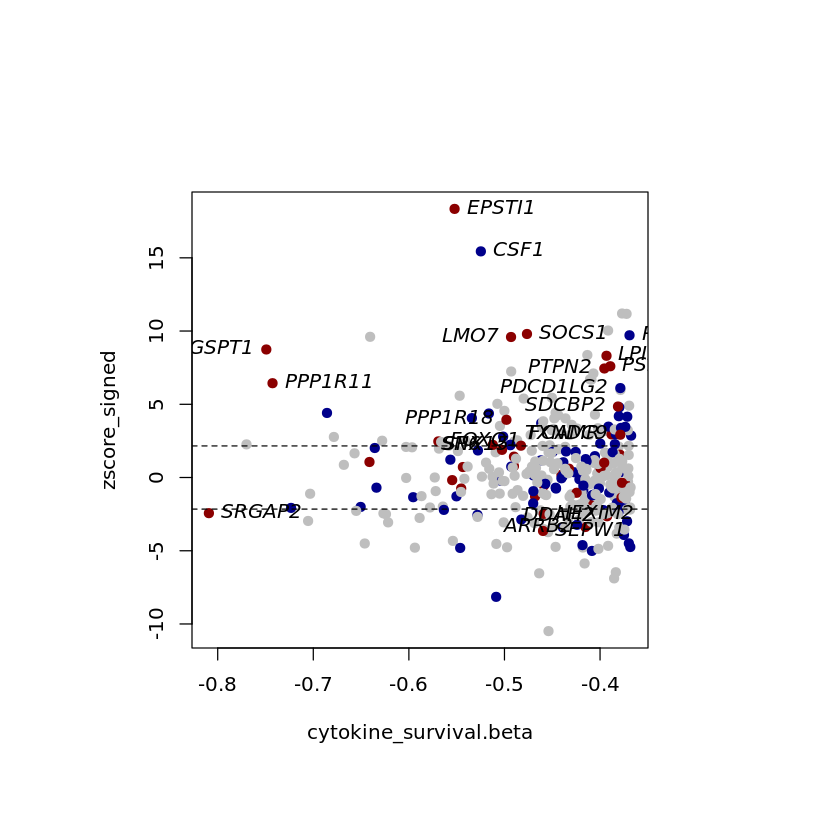

In [153]:
#pdf("../cytokine_figures/T1D_plot_with_mhc.pdf")
par(mar=c(8,8,8,8))
plot(zscore_signed~cytokine_survival.beta,m, pch=19, 
     #col=c("gray", "red4")[(m$Gene %in% dgenes)+1])
col=c("gray","blue4" ,"red4" ) [as.numeric(as.factor(m$cat2))])

abline (h= min(abs(m$zscore)[m$padj<0.1], na.rm=T), lty=2)
abline (h= -min(abs(m$zscore)[m$padj<0.1], na.rm=T), lty=2)
sig = subset(m, (m$padj<0.1 & m$t1d) | (m$zscore_signed>5 & m$t1d_1e4 ))
text(sig[,c('cytokine_survival.beta', 'zscore_signed')], labels = sig$Gene,
    pos=c(2,4), font=3)
#dev.off()

In [155]:
# png("../cytokine_figures/T1D_plot_with_mhc.png", height = 4, width = 4, res = 200, unit= 'in')
# par(mar=c(0,0,0,0))
# plot(zscore_signed~cytokine_survival.beta,m, pch=19, 
     
# col=c("gray","blue4" ,"red4" ) [as.numeric(as.factor(m$cat2))])


# dev.off()

### Gene ontology

In [1]:
library(breaker)

In [2]:
library(pheatmap)

In [3]:
suppressPackageStartupMessages(library(gplots))

In [30]:
M$cr_up = M$cytokine_survival.fdr<0.1 & M$cytokine_survival.beta>0
M$cr_do = M$cytokine_survival.fdr<0.1 & M$cytokine_survival.beta<0
M$cr_up_exp_do = M$cr_do & M$padj<0.1 & M$log2FoldChange >0
M$cr_up_exp_do_T1D = M$cr_up_exp_do & (M$t1d | M$t1d_1e4)

In [31]:
M = M[order(M$pvalue),]

In [32]:
writeLines(m$Gene[m$padj<0.1 & m$log2FoldChange>0], "Listgenes_1.txt")
writeLines(na.omit(m$Gene[m$cat2!='00' & m$padj<0.1 & m$log2FoldChange>0]), "Listgenes_2.txt")
writeLines(na.omit(m$Gene[m$t1d & m$padj<0.1 & m$log2FoldChange>0]), "Listgenes_3.txt")

In [ ]:
#list1 = 84
#list2 = 35
#list3 = 15

In [34]:
impgenes =na.omit(m$Gene[m$t1d & m$padj<0.1 & m$log2FoldChange>0]) 

In [35]:
impgenes[!(impgenes %in% dgenes_save)] ###<- MHC genes

[1] "PPP1R11" "PPP1R18"

In [36]:
#go = read.table("GSEA_selected_results.txt", header=T, sep="\t", stringsAsFactors = F)
go = read.table("GSEA_min20_max1000.tsv", header=T, sep="\t", stringsAsFactors = F)

In [41]:
#go = read.table("GSEA_alldown_UP_20-1000.tsv", header=T, sep="\t", stringsAsFactors = F)
go = read.table("GSEA_alldown_UP_20-1000_tpm1.tsv", header=T, sep="\t", stringsAsFactors = F)


In [42]:
go$LogP = -log(go$p.value,10)

In [43]:
go$Name = tolower(gsub("_", " ", go$Gene_Set_Name))
go$Name = gsub("gobp", "GOBP:",go$Name)
go$Name = gsub("reactome", "REACTOME:",go$Name)

In [45]:
#pdf("../cytokine_figures/GO_enrichment_crispr_screen_names_oneline.pdf")
pdf("../cytokine_figures/GO_enrichment_crispr_screen_allresults.pdf")

par(mar = c(8,12,4,4), mfcol=c(2,2))
plot.new()
plot.new()
barplot(go$LogP[10:1], names.arg=go$Name[10:1], horiz=T, xlim=c(0,8),
   las=1, cex.axis=1, cex.names=0.8)
barplot(go$LogP[20:11], names.arg=go$Name[20:11], horiz=T, xlim=c(0,8),
   las=1, cex.axis=1, cex.names=0.8)

                  dev.off()


png 
  2

In [47]:
#bp_mat = read.table("gobp_overlap_matrix.txt", header=T, sep="\t", stringsAsFactors = F)
bp_mat = read.table("overlap_BP_min20max1000.mat.txt", header=T, sep="\t", stringsAsFactors = F)
rownames(bp_mat) = bp_mat$Gene.Symbol
bp_mat = bp_mat[ rownames(bp_mat) %in% M$Gene[M$cr_up_exp_do_T1D], 4:13]
#re_mat = read.table("reactome_overlap_matrix.txt", header=T, sep="\t", stringsAsFactors = F)
re_mat = read.table("overlap_reactome_min20max1000.mat.txt", header=T, sep="\t", stringsAsFactors = F)
rownames(re_mat) = re_mat$Gene.Symbol
re_mat = re_mat[ rownames(re_mat) %in% M$Gene[M$cr_up_exp_do_T1D], 4:13]

In [48]:
mermat = merge(bp_mat,re_mat, all=T, by="row.names" )

In [49]:
mat = t(apply(mermat[,-1], 1, function(x) as.numeric(x!="")))

In [50]:
mat[is.na(mat)]<-0

In [51]:
rownames(mat) = mermat[,1]
colnames(mat) = colnames(mermat)[-1]

In [52]:
mat = mat[order(-rowSums(mat)),]

In [53]:
pheatmap(t(mat), cluster_rows = F, cluster_cols = F, legend = FALSE, col=c(0,1),
         fontsize_col = 9,
         gaps_row = 10,
         angle_col = 45, 
         file = "../cytokine_figures/gobp_react_crispr_screen_new.pdf",
         cellwidth = 10, cellheight = 10)